In [106]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
from urllib.request import urlretrieve 

In [ ]:
medical_df = pd.read_csv('/home/juto/Desktop/ML_libraries/scikit-learn/data/medical-charges.csv')
medical_df

In [ ]:
medical_df.info()

In [ ]:
medical_df.describe()

In [110]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

In [ ]:
fig = px.histogram(medical_df, x='age', 
                   marginal= 'box',
                   nbins=47,
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, 
                   x='bmi',
                   marginal= 'box',
                   color_discrete_sequence=['red'],
                    title='Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal= 'box',
                   color='region',
                   color_discrete_sequence=['blue', 'red', 'green', 'gray'],
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

In [ ]:
fig = px.histogram(medical_df, x='smoker',
                   color = 'sex',
                   marginal= 'box',
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(medical_df, 
                   x='age',
                   y='charges', 
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                    title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                x= 'bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_df, x='children', y='charges')

## Correlation

In [ ]:
medical_df.charges.corr(medical_df.age)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)


In [ ]:
medical_df.head()

In [ ]:
sns.heatmap(medical_df.corr(numeric_only='int', method='pearson'), cmap='magma', annot=True)
plt.title('Correlation Matrix')

## Linear Regressioin using a Single Feature

In [125]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
plt.title('Age vs Charges')
sns.scatterplot(non_smoker_df, x='age', y='charges', alpha=0.7, s=15    )

## Modelling

In [127]:
"""
this is our first machine learning model
m=linear regression modelling
"""
def estimate_charges(age, w, b):
    return w * age + b

In [128]:
w = 50
b =100

In [ ]:
estimate_charges(40, w, b)

In [ ]:
ages = non_smoker_df.age
ages

In [ ]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

In [ ]:
non_smoker_df.charges

In [ ]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Chrges')

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages,target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

In [135]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target= non_smoker_df.charges
    
    estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()

In [ ]:
try_parameters(60, 200)

In [ ]:
try_parameters(340, -5500)

In [138]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
non_smoker_df.age

In [140]:
w =50
b= 100

In [141]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [165]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [145]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target= non_smoker_df.charges
    predicted = estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    
    loss = rmse(targets, predicted)
    plt.show()
    print("RMSE LOSS: ", loss)

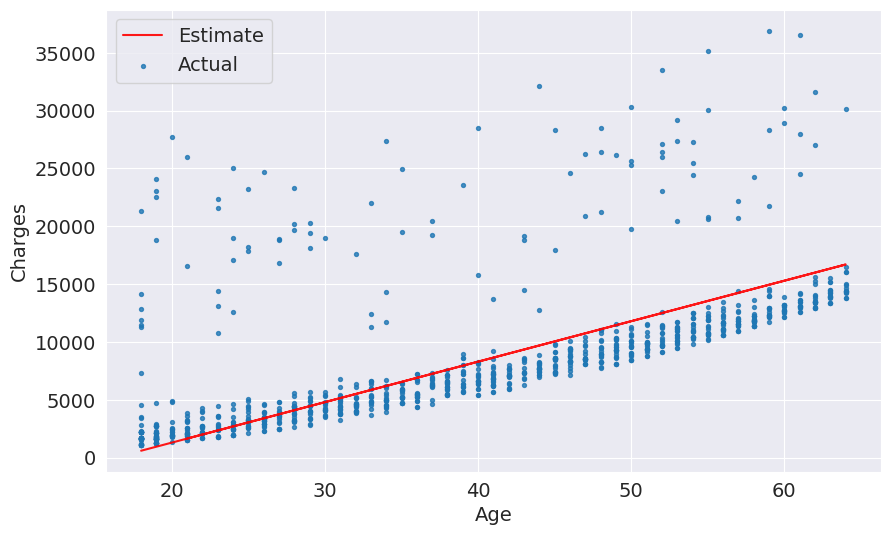

RMSE LOSS:  4818.502020532258


In [166]:
try_parameters(350, -5700)

In [153]:
model = LinearRegression()

In [ ]:
help(model.fit)

In [158]:
inputs = non_smoker_df[['age']]# needs to be a 1dimensional array
targets = non_smoker_df.charges
print("imputes..shape; ", inputs.shape)
print("targets.shape: ", targets.shape)

imputes..shape;  (1064, 1)
targets.shape:  (1064,)


In [159]:
model.fit(inputs, targets)

LinearRegression()

In [161]:
model.predict([[23],
               [37],
               [61]])

/home/juto/Desktop/ML_libraries/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [163]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [164]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [167]:
model.coef_

array([267.24891283])

In [168]:
model.intercept_

np.float64(-2091.4205565650864)

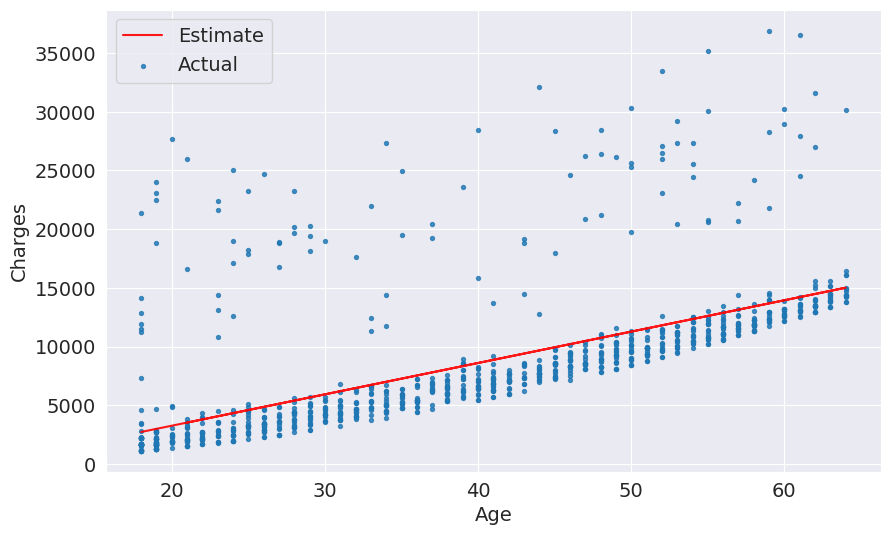

RMSE LOSS:  4662.505766636395


In [170]:
try_parameters(model.coef_, model.intercept_)

## Using The SGDRegressor

In [171]:
from sklearn.linear_model import SGDRegressor

In [172]:
model = SGDRegressor()

In [175]:
model.fit(inputs, targets)

SGDRegressor()

In [176]:
predictions = model.predict(inputs)
predictions

array([-458.86460197, 2806.30093742, 4438.88370711, ..., -458.86460197,
       -458.86460197,  520.68505985])

In [180]:
rmse(targets, predictions)

np.float64(5107.337218441471)

In [182]:
model.coef_

array([326.51655394])

In [183]:
model.intercept_

array([-6336.16257287])

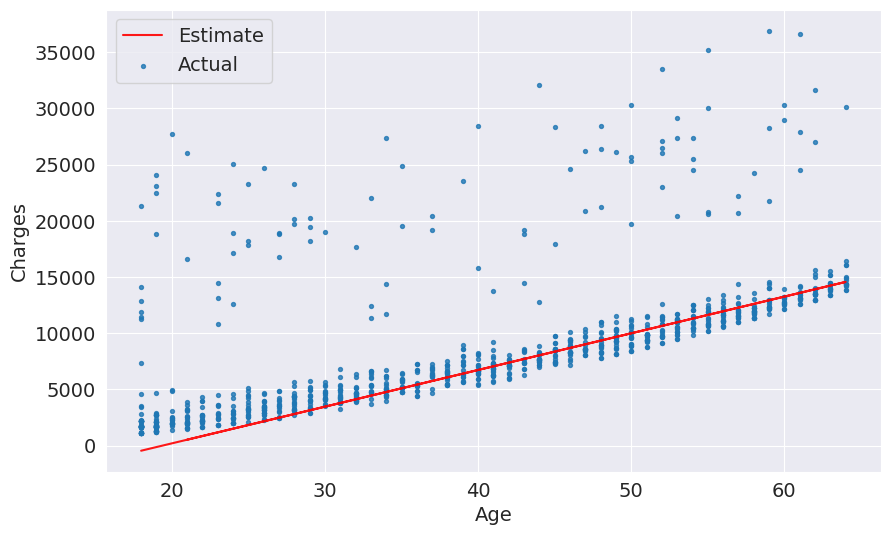

RMSE LOSS:  5107.337218441471


In [178]:
try_parameters(model.coef_, model.intercept_)

### shorthand for modelling

In [186]:
# Create inputs and targets 
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss =rmse(targets, predictions)
print('LOSS: ', loss) 

LOSS:  4662.505766636395
